In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve

In [2]:
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [5]:
data.drop('id',inplace=True,axis=1)

In [6]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
                        'Residence_type', 'smoking_status']
encoders = {}

In [7]:
def age_group(x):
    if x<13: return "Child"
    elif 13<x<20: return "Teenager"
    elif 20<x<=60: return "Adult"
    else: return "Elder"
    
data["age_group"] = data.age.apply(age_group)

def bmi_group(x):
    if x<18.5 : return "UnderWeight"
    elif 18.5<x<25: return "Healthy"
    elif 25<x<30: return "OverWeight"
    else: return "Obese"

data["bmi_group"] = data.bmi.apply(bmi_group);

categorical_features.extend(['age_group', 'bmi_group'])

In [8]:
for each in categorical_features:
    encoders[each] = LabelEncoder()
    data[each] = encoders[each].fit_transform(data[each])

In [9]:
X = data.drop('stroke',axis=1)
y = data['stroke']

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,2,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,0,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2,0


In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size =0.2)

In [12]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)
print(x_train_std)
print(x_test_std)

[[ 1.19601102 -0.05790627 -0.33024432 ...  0.59247163 -0.838094
  -0.22061977]
 [ 1.19601102  0.60571266 -0.33024432 ... -0.34375721 -0.838094
   0.91383762]
 [-0.83442629 -0.72152521 -0.33024432 ...  0.59247163 -0.838094
   0.91383762]
 ...
 [-0.83442629 -0.854249   -0.33024432 ... -1.27998605 -0.838094
  -1.35507716]
 [ 1.19601102  0.69419519 -0.33024432 ... -0.34375721 -0.838094
   0.91383762]
 [-0.83442629  1.6232617  -0.33024432 ... -1.27998605  1.11522885
   0.91383762]]
[[-0.83442629  0.38450635  3.02806113 ... -0.34375721 -0.838094
   0.91383762]
 [ 1.19601102 -1.20817909 -0.33024432 ...  0.59247163  2.09189027
  -0.22061977]
 [ 1.19601102  0.95964276 -0.33024432 ...  1.52870047  1.11522885
   0.91383762]
 ...
 [ 1.19601102 -1.29666162 -0.33024432 ... -1.27998605  2.09189027
  -1.35507716]
 [ 1.19601102 -1.82755677 -0.33024432 ... -1.27998605  0.13856742
  -1.35507716]
 [-0.83442629  1.49053791  3.02806113 ...  0.59247163  1.11522885
  -0.22061977]]


In [13]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi', 'smoking_status']
def process_input(x):
    x = pd.DataFrame(x, columns=columns)
    x["bmi_group"] = data.bmi.apply(bmi_group);
    x["age_group"] = data.age.apply(age_group)
    for each in categorical_features:
        x[each] = encoders[each].transform(x[each])
    x = std.transform(x)
    return x
        
x = [['Female', 67.0, 0, 1, 'Yes', 'Self-employed', 'Urban', 228.69, 36.6, 'never smoked']]
x = process_input(x)  

In [14]:
from sklearn.svm import SVC
sv = SVC(probability=True)
sv.fit(x_train_std, y_train)

SVC(probability=True)

In [15]:
y_pred = sv.predict(x_test)
ac_rf = accuracy_score(y_test,y_pred)
print(f"Accuracy of support vector classifier in total dataset: {ac_rf}")
y1 = sv.predict(x)
print(y1)
results = sv.predict_proba(x)
print(results)

Accuracy of support vector classifier in total dataset: 0.952054794520548
[0]
[[0.93841521 0.06158479]]


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
print(dt.feature_importances_)
print(x_train.columns.values)

[0.03902415 0.19164512 0.02552196 0.02559491 0.02108968 0.05114644
 0.02557208 0.31779308 0.23868962 0.0572275  0.0026286  0.00406685]
['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status' 'age_group'
 'bmi_group']


In [17]:
for j,i in zip(dt.feature_importances_,x_train.columns.values):
    print(f"{i} : {j}")

gender : 0.03902414537908362
age : 0.19164512313007495
hypertension : 0.02552195546689846
heart_disease : 0.025594908112424847
ever_married : 0.0210896826226542
work_type : 0.051146444970390836
Residence_type : 0.025572075625979098
avg_glucose_level : 0.31779308243108073
bmi : 0.23868962258193863
smoking_status : 0.05722750489118328
age_group : 0.002628600823045266
bmi_group : 0.004066853965246053


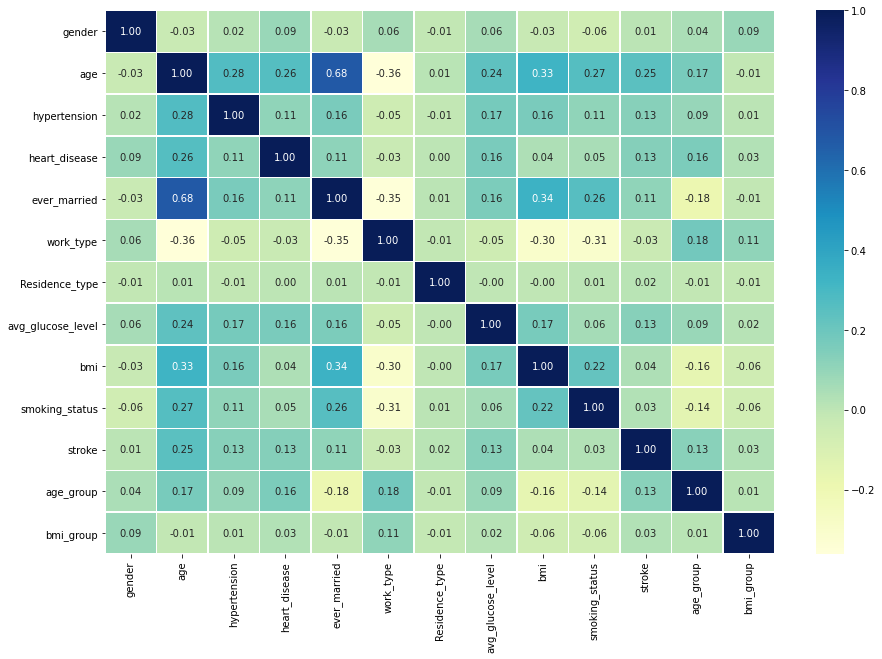

In [18]:
#visulaize correlation matrix
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## Modelling

In [19]:
#split the data into x and y
x=data.drop("stroke",axis=1)
y=data["stroke"]

In [20]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier (n_estimators=100)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
#split data into train and test sets
np.random.seed(10)
#split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

In [22]:
#fit the model
model.fit(x_train,y_train);

In [23]:
y_preds =model.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#model score during training
model.score(x_train,y_train)

1.0

In [25]:
#model score with testing
model.score(x_test,y_test)

0.9363992172211351

In [26]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



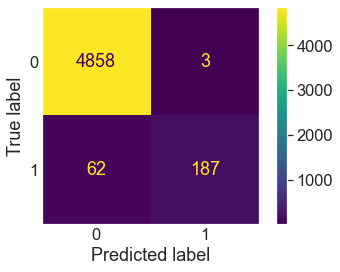

In [27]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x,y);
#remove the plot lines in confusion matrix
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)